**CNN for MNIST dataset**

In [ ]:
from sklearn.datasets import fetch_openml 

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
mnist_dataset = fetch_openml('mnist_784')
X = mnist_dataset['data']
print(type(mnist_dataset))

<class 'sklearn.utils.Bunch'>


In [ ]:
print('X', type(X), X.shape)

X <class 'numpy.ndarray'> (70000, 784)


In [ ]:
y = mnist_dataset['target']
print('y', type(y), y.shape)


y <class 'numpy.ndarray'> (70000,)


In [ ]:
X_train, X_test =  X[:60000], X[60000:]
y_train, y_test =  y[:60000], y[60000:]

<BarContainer object of 10 artists>

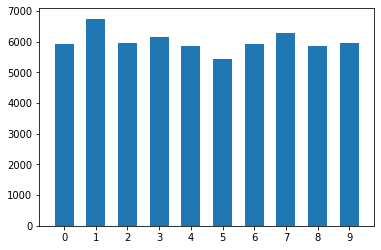

In [ ]:
digit_train, count_train = np.unique(y_train, return_counts = True)
distribution_train = dict (zip(digit_train,count_train))
plt.bar(list(distribution_train.keys()), distribution_train.values(), width=0.6)


(array([0.10038889, 0.10968519, 0.10818519, 0.12485185, 0.11016667,
        0.11033333, 0.11353704, 0.10959259, 0.11601852, 0.10835185]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

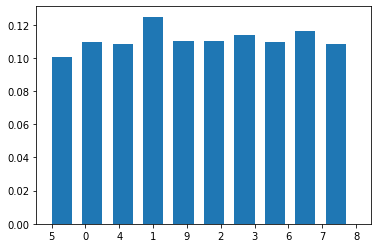

In [ ]:
plt.hist(y_train,density = True, width = 0.6)


<BarContainer object of 10 artists>

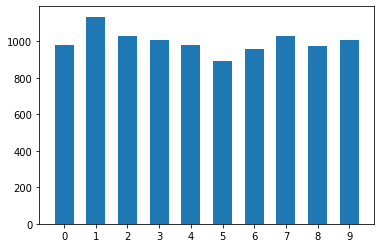

In [ ]:
digit_test, counts_test = np.unique(y_test, return_counts=True)
distribution_test = dict(zip(digit_test, counts_test))
plt.bar(list(distribution_test.keys()), distribution_test.values(), width = 0.6)

(array([0.11422222, 0.11466667, 0.12611111, 0.10888889, 0.10911111,
        0.11211111, 0.09911111, 0.10644444, 0.11222222, 0.10822222]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

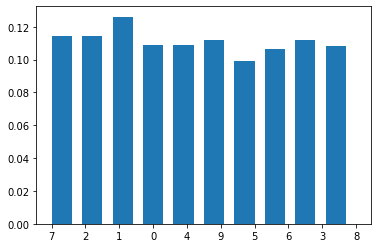

In [ ]:
plt.hist(y_test, density = True , width = 0.6)

Text(0.5, 1.0, 'After Scaling')

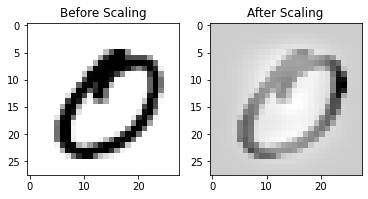

In [ ]:
from random import randint
rnd_number = randint(0,len(X_train))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
plt.subplot(1,2,1)
plt.imshow(X_train[rnd_number].reshape(28,28),cmap=plt.cm.binary, interpolation='nearest')
plt.title('Before Scaling')
plt.subplot(1,2,2)
plt.imshow(X_train_scaled[rnd_number].reshape(28,28),cmap=plt.cm.binary, interpolation='nearest')
plt.title('After Scaling')


In [ ]:
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size = 1/6 , random_state = 42)
print(X_train.shape, X_val.shape)

(50000, 784) (10000, 784)


In [ ]:
X_train = X_train.reshape((-1,28,28,1))
X_train.shape

(50000, 28, 28, 1)

In [ ]:
X_val = X_val.reshape((-1,28,28,1))
X_val.shape

(10000, 28, 28, 1)

In [ ]:
import keras
from keras.layers import Activation, Dense

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = [28,28,1]))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate = 0.001)
model.compile(optimizer = sgd, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val   = X_val.astype('float32')/255.0
y_val   = y_val.astype('uint')

model.fit(X_train,y_train,batch_size=120, epochs = 10, validation_data=(X_val,y_val))

Epoch 1/10
417/417 [==============================] - 116s 279ms/step - loss: 2.2309 - accuracy: 0.2088 - val_loss: 2.1087 - val_accuracy: 0.4703
Epoch 2/10
417/417 [==============================] - 116s 278ms/step - loss: 1.9182 - accuracy: 0.4312 - val_loss: 1.5158 - val_accuracy: 0.7020
Epoch 3/10
417/417 [==============================] - 116s 279ms/step - loss: 1.3154 - accuracy: 0.6066 - val_loss: 0.8350 - val_accuracy: 0.8106
Epoch 4/10
417/417 [==============================] - 120s 287ms/step - loss: 0.9307 - accuracy: 0.7104 - val_loss: 0.5853 - val_accuracy: 0.8504
Epoch 5/10
417/417 [==============================] - 116s 278ms/step - loss: 0.7619 - accuracy: 0.7612 - val_loss: 0.4793 - val_accuracy: 0.8709
Epoch 6/10
417/417 [==============================] - 117s 280ms/step - loss: 0.6707 - accuracy: 0.7922 - val_loss: 0.4219 - val_accuracy: 0.8832
Epoch 7/10
417/417 [==============================] - 117s 280ms/step - loss: 0.6089 - accuracy: 0.8116 - val_loss: 0.3829 -

In [ ]:
X_test = X_test.reshape((-1,28,28,1))
X_test.shape

(10000, 28, 28, 1)

**TEST ACCURACY**

In [ ]:
X_test = X_test.astype('float32')/255.0
y_test = y_test.astype('uint')

loss,acc = model.evaluate(X_test,y_test)
print('Accuracy: %.3f' % acc)

313/313 [==============================] - 7s 21ms/step - loss: 0.3098 - accuracy: 0.9137
Accuracy: 0.914


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model.predict(X_test)
y_pred = model.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix
[[ 958    0   11    4    1   11   12    3    7   13]
 [   0 1116    2    1    2    4    3   19    9    8]
 [   3    3  911   22    4    2    4   23    8    5]
 [   1    3   13  902    0   41    1    2   21   11]
 [   0    1   18    1  897   14   11   11    9   40]
 [   3    1    1   25    0  769   18    0   24    6]
 [   9    4   20    3   18   20  904    1   12    0]
 [   1    0   21   14    3    3    1  927   11   23]
 [   5    7   34   26    4   21    4    5  857    7]
 [   0    0    1   12   53    7    0   37   16  896]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.